# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 7
### Dekompozycja spektralna
#### Mateusz Surjak

In [26]:
import scipy.linalg
import time
import matplotlib.pyplot as plt
import numpy as np

# Metoda potęgowa

Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co
do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację
z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od
rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).


Poniżej prezentuje funkcje do generowania symetrycznych macierzy rozmiaru NxN

In [55]:
def create_matrix(N):
    a = np.random.rand(N, N)
    return  np.tril(a) + np.tril(a, -1).T

Zdefiniowałem metodę odbliczącą  dominującą wartośc własną i odpowiadający jej wektor własny zgodnie z treścią zadania.
Na końcu znormaliozowałem otrzymany wektor własny.

In [56]:
def power_method(matrix, iter_count=10000, E=10**(-10)):
    N = len(matrix)
    
    x1 = np.random.uniform(size=(N, 1))
    i = 0
    while i<iter_count:
        i+=1
        
        x2 = np.matmul(matrix,x1)
        x2_norm = np.linalg.norm(x2, ord=np.inf)
        norm = x2/x2_norm
        
        if np.linalg.norm(norm-x1) < E:
            
            x1 = norm
            x2_norm = np.linalg.norm(x2, np.inf)
            x1_norm = np.linalg.norm(x1)
            return (x2_norm, (x1/x1_norm).reshape(N))
        
        x1 = norm
        x2_norm = np.linalg.norm(x2, np.inf)
        x1_norm = np.linalg.norm(x1)
    return (x2_norm, (x1/x1_norm).reshape(N))

Następnie zdefiniowałem funkcje która zwraca dominującą wartość własną (największą co do modułu) oraz odpowiadający tej wartości wektor własny korzystając z biblioteki scipy.

In [57]:
def get_eigenvalue_and_eigenvector(M):
    values, vectors = scipy.linalg.eigh(M)
    idx = 0
    val = 0
    for i,j in enumerate(values):
        if abs(j)>val:
            val = abs(j)
            idx = i
    
    return val, vectors[:,idx]/np.linalg.norm(vectors[:,idx])

Poniżej znajduje się funckcja która porównuje wyniki z wynikami bibliotecznymi oraz
rysuje wykres zależności czasu od rozmiaru macierzy.

In [58]:
def check_results_and_draw_time_plot():
    E=10**(-6)
    Ns = [i for i in range(100,2100,100)]
    times = []
    
    for n in Ns:
        
        M = create_matrix(n)
        
        start = time.time()
        val, vec = power_method(M)
        end = time.time()
        
        times.append((end-start)*1000)

        lib_val, lib_vec = get_eigenvalue_and_eigenvector(M)

        if lib_vec[0]*vec[0]<0:
            lib_vec = np.multiply(lib_vec , -1)
        
        print(f"""\tfor n = {n}
              equality of eigenvalues: {abs(lib_val-val)<E},
              eguality of eigenvectors: {np.allclose(vec, lib_vec, rtol=E)}
              """)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
    ax1.set_xlabel("N")
    ax1.set_ylabel("Time [ms]")
    fig.suptitle("Time of power method")
    ax1.plot(Ns, times,'bo')   
    plt.show()

	for n = 100
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 200
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 300
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 400
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 500
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 600
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 700
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 800
              equality of eigenvalues: True,
              eguality of eigenvectors: True
              
	for n = 900
              equality of eigenvalues: True

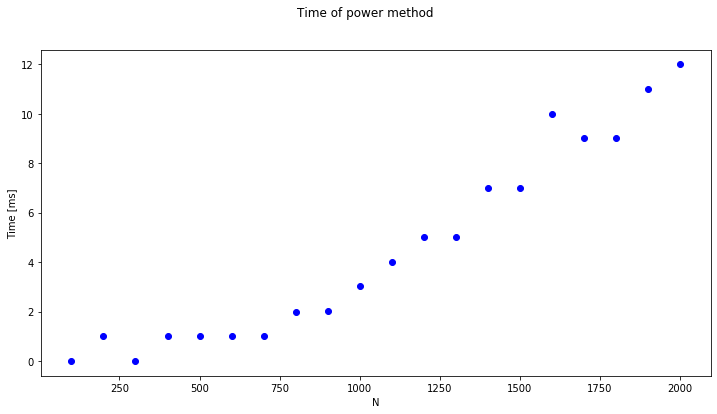

In [59]:
iterations_power_method = check_results_and_draw_time_plot()

## Wnioski:
- Metoda potęgowa jest stosowana do wyznaczenia maksymalnej wartości
własnej, z małą modyfikacją może służyć również do obliczania minimalnej i średniej
wartości.
- Metoda potegowa jest szybka, w krótkim czasie potrafi dać wynik dla dużych rozmiarów macierzy.

# Odwrotna metoda potęgowa

Opierając się na twierdzeniu o transformacji widma macierzy:

**Twierdzenie 1**     Macierz $(A-\sigma I)^{-1}$ (jeśli istnieje) to ma wartości własne równe $\frac{1}{\lambda_{k}-\sigma}$
($\lambda_{k}$ jest k-tą wartością macierzy A) i wektory własne identyczne z macierzą A.

oraz wykorzystując metodę potęgową i faktoryzację LU zaimplementuj odwrotną metodę
potęgową pozwalającą na szybkie znalezienie wektorów własnych macierzy A,dla wartości $\sigma$ bliskich odpowiedniej wartości własnej.Wykorzystaj fakt, że mnożenie wektora $x_i$
przez macierz $A^{−1}
(x_{i+1} = A^{−1}x_i)$ odpowiada rozwiązaniu układu równań $Ax_{i+1} = x_i$

Poniżej prezentuje implementacje odwrotnej metody potęgowej

In [60]:
def inverse_power_method(A, sig, iter_count=10000):
    E = 10**(-4)
    N = len(A)
    
    x1 = np.random.uniform(size=(N, 1))
    
    M = A - sig*np.identity(N)
    
    i = 0
    while i < iter_count:
        i += 1
        
        P,L,U = scipy.linalg.lu(M)
        
        Y = scipy.linalg.solve_triangular(L, np.matmul(P,x1))
        x2 = scipy.linalg.solve_triangular(U, Y)
        
        x2_norm = np.linalg.norm(x2, ord=np.inf)
        
        norm = x2/x2_norm
        if np.linalg.norm(norm-x1) < E:
            norm_norm = np.linalg.norm(norm)
            return (norm/norm_norm).reshape(N)
        x1 = norm
        x1_norm = np.linalg.norm(x1)
        
    return (x1/x1_norm).reshape(N)

Następnie zdefinowałem funkcje do sprawdzania poporawności wyników zwracanych przez powyższą implementacje porównujac wyniki z wynikami bibliotecznymi.

In [61]:
def check_results_inv_power_method(E = 10**(-4)):
    Ns = [20,30,40,50,100,120,160,200]
    times = []
    for N in Ns:
        
        M = create_matrix(N)
        
        lib_val, lib_vec = get_eigenvalue_and_eigenvector(M)
        
        start = time.time()
        vec = inverse_power_method(M, lib_val+E)
        end = time.time()
        
        times.append((end-start)*1000)
        
        if lib_vec[0]*vec[0]<0:
            lib_vec =np.multiply(lib_vec, -1)
             
        print(f"""for n = {N},
        equality of eigenvectors: {np.allclose(vec, lib_vec, rtol=10**(-2))}
        """)
        
    fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
    ax1.set_xlabel("N")
    ax1.set_ylabel("Time [ms]")
    fig.suptitle("Time of inverse power method")
    ax1.plot(Ns, times,'bo')   
    plt.show()

for n = 20,
        equality of eigenvectors: True
        
for n = 30,
        equality of eigenvectors: True
        
for n = 40,
        equality of eigenvectors: True
        
for n = 50,
        equality of eigenvectors: True
        
for n = 100,
        equality of eigenvectors: True
        
for n = 120,
        equality of eigenvectors: True
        
for n = 160,
        equality of eigenvectors: True
        
for n = 200,
        equality of eigenvectors: True
        


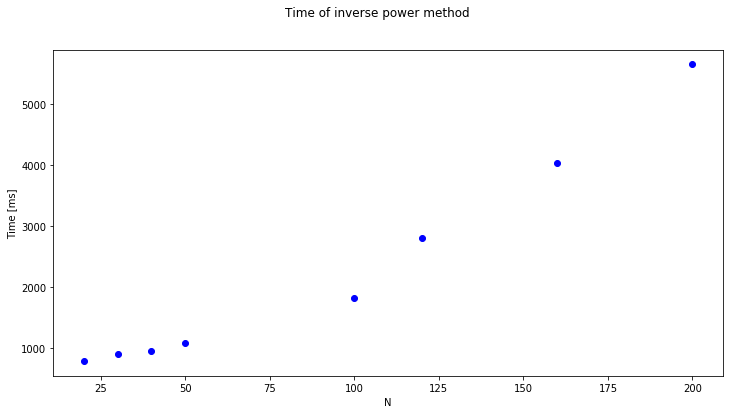

In [62]:
check_results_inv_power_method()

for n = 20,
        equality of eigenvectors: True
        
for n = 30,
        equality of eigenvectors: True
        
for n = 40,
        equality of eigenvectors: True
        
for n = 50,
        equality of eigenvectors: True
        
for n = 100,
        equality of eigenvectors: True
        
for n = 120,
        equality of eigenvectors: True
        
for n = 160,
        equality of eigenvectors: True
        
for n = 200,
        equality of eigenvectors: True
        


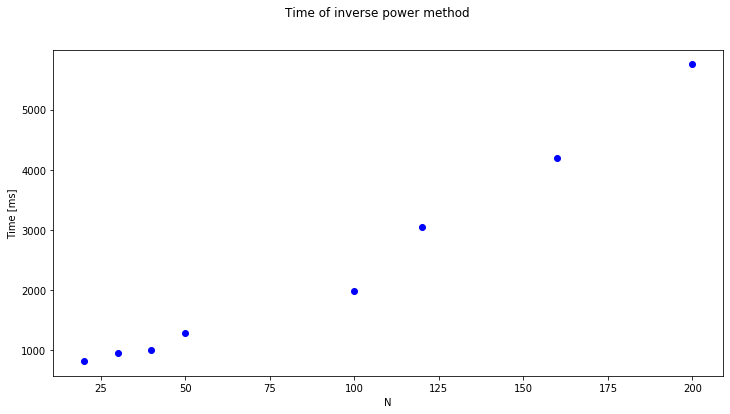

In [63]:
check_results_inv_power_method(E=10**(-8))

for n = 20,
        equality of eigenvectors: True
        
for n = 30,
        equality of eigenvectors: True
        
for n = 40,
        equality of eigenvectors: True
        
for n = 50,
        equality of eigenvectors: True
        
for n = 100,
        equality of eigenvectors: True
        
for n = 120,
        equality of eigenvectors: True
        
for n = 160,
        equality of eigenvectors: True
        
for n = 200,
        equality of eigenvectors: True
        


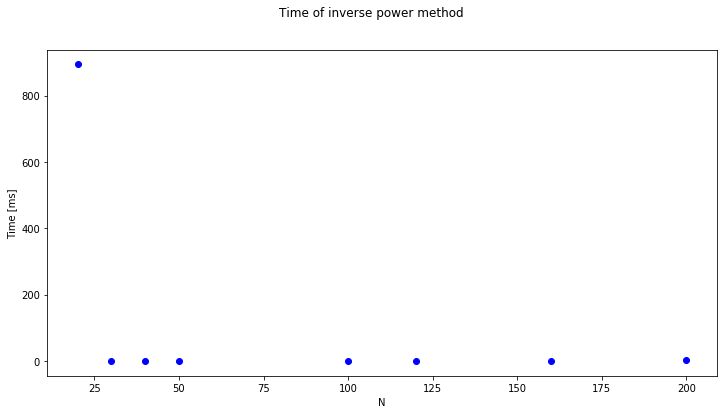

In [64]:
check_results_inv_power_method(E=10**(-14))

for n = 20,
        equality of eigenvectors: True
        
for n = 30,
        equality of eigenvectors: True
        
for n = 40,
        equality of eigenvectors: True
        
for n = 50,
        equality of eigenvectors: True
        
for n = 100,
        equality of eigenvectors: True
        
for n = 120,
        equality of eigenvectors: True
        
for n = 160,
        equality of eigenvectors: True
        
for n = 200,
        equality of eigenvectors: True
        


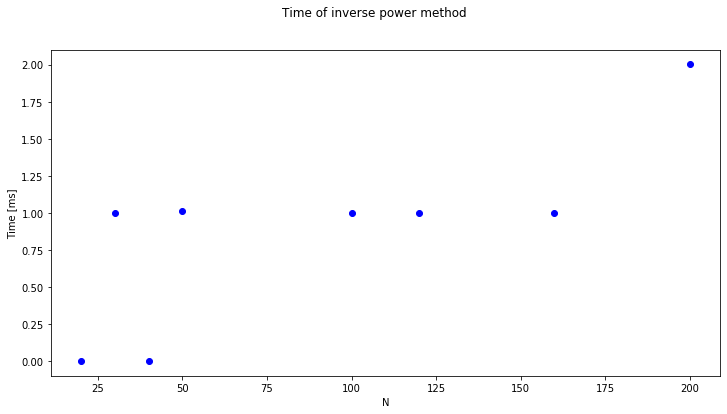

In [65]:
check_results_inv_power_method(E=10**(-16))

## Wnioski:
- Czym sigma jest bliższa odpowiedniej wartości własnej tym algorytm jest szybszy
- Odwrotna metoda potęgowa pozwala na szybkie znalezienie wektorów własnych macierzy, dla wartości $\sigma$ bliskich odpowiedniej wartości własnej.